In [2]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [4]:
start = '2020-05-23'
end = '2021-05-22'

df = data.DataReader('^N225', 'yahoo', start, end)

In [4]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-25,20741.650391,20584.060547,20653.410156,20741.650391,55100000,20741.650391
2020-05-26,21328.339844,20918.109375,20927.960938,21271.169922,87200000,21271.169922
2020-05-27,21475.679688,21142.720703,21249.310547,21419.230469,112000000,21419.230469
2020-05-28,21926.289062,21580.500000,21612.900391,21916.310547,134000000,21916.310547
2020-05-29,21955.439453,21710.800781,21807.630859,21877.890625,153200000,21877.890625
2020-06-01,22161.390625,21898.990234,21910.890625,22062.390625,72200000,22062.390625
2020-06-02,22401.789062,22118.400391,22175.519531,22325.609375,77900000,22325.609375
2020-06-03,22818.869141,22462.679688,22649.009766,22613.759766,94100000,22613.759766
2020-06-04,22907.919922,22501.810547,22885.140625,22695.740234,92000000,22695.740234


In [5]:
date=df.index
close=df['Adj Close']

In [6]:
span01=5
span02=25
span03=50

df['sma01'] = close.rolling(window=span01).mean()
df['sma02'] = close.rolling(window=span02).mean()
df['sma03'] = close.rolling(window=span03).mean()

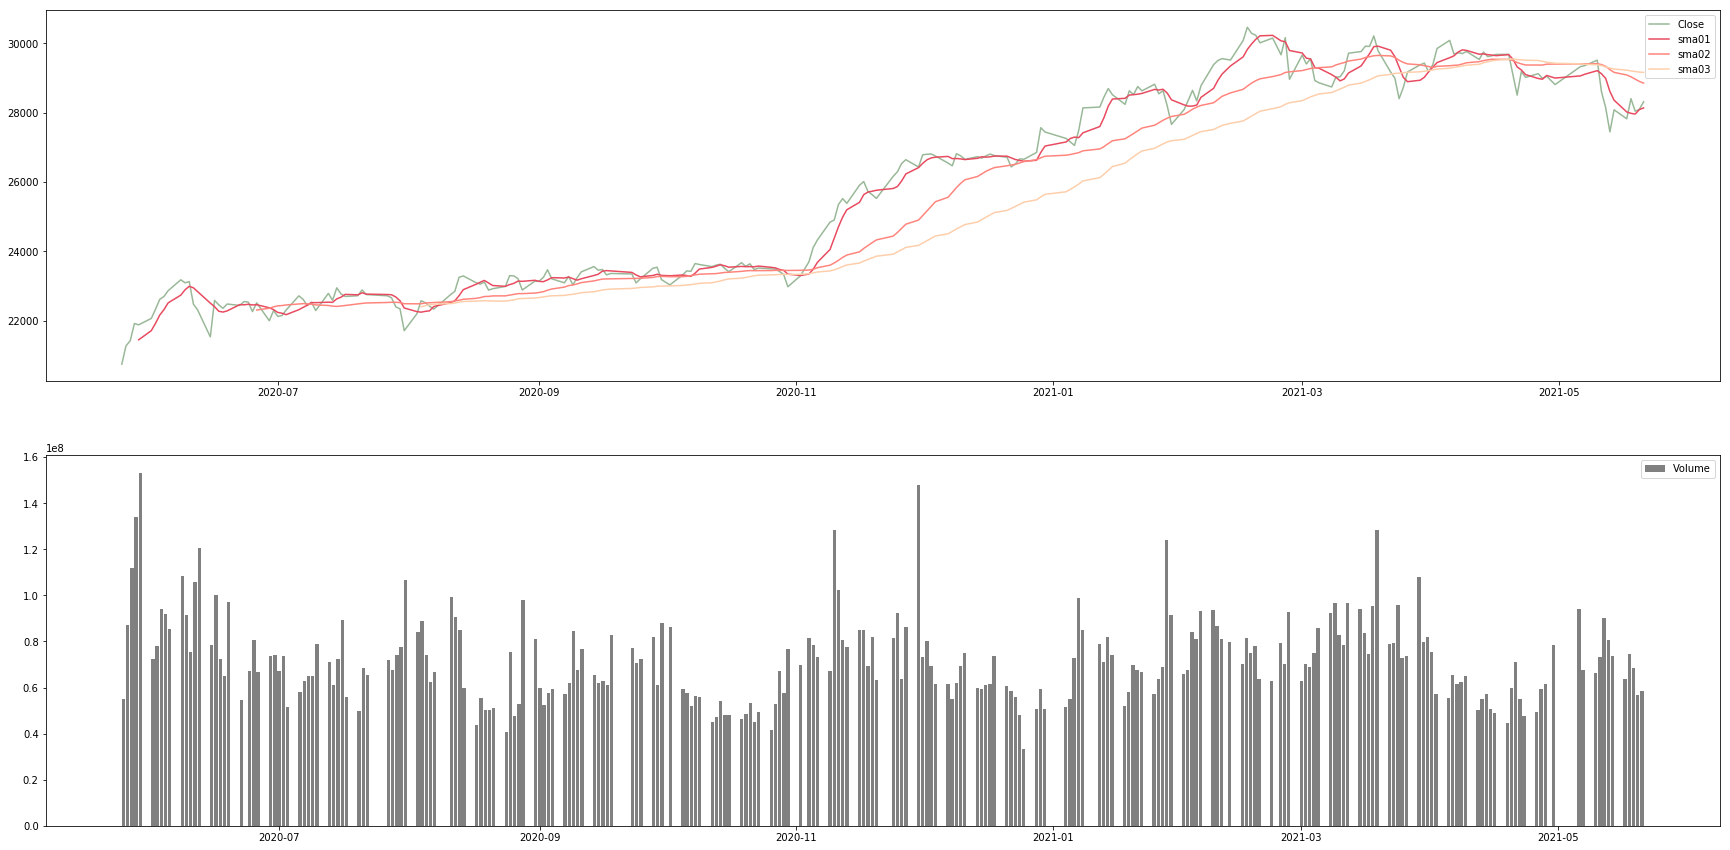

In [7]:
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

In [8]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2021-05-17,28312.779297,27632.529297,28310.460938,27824.830078,63900000,27824.830078,28022.682031,29090.159297,29229.257266,-361.043726,-208.532669,-152.511058
2021-05-18,28481.169922,27931.570312,27931.570312,28406.839844,74700000,28406.839844,27982.332031,29037.201328,29206.212070,-343.992766,-235.624688,-108.368077
2021-05-19,28216.650391,27842.980469,28031.220703,28044.449219,68700000,28044.449219,27961.719922,28970.620078,29188.498867,-355.622259,-259.624202,-95.998057
2021-05-20,28176.869141,27821.960938,27875.500000,28098.250000,56800000,28098.250000,28091.767969,28903.827656,29173.177461,-356.389210,-278.977204,-77.412006
2021-05-21,28411.560547,28193.029297,28269.609375,28317.830078,58700000,28317.830078,28138.439844,28854.991641,29164.669063,-335.412323,-290.264228,-45.148095


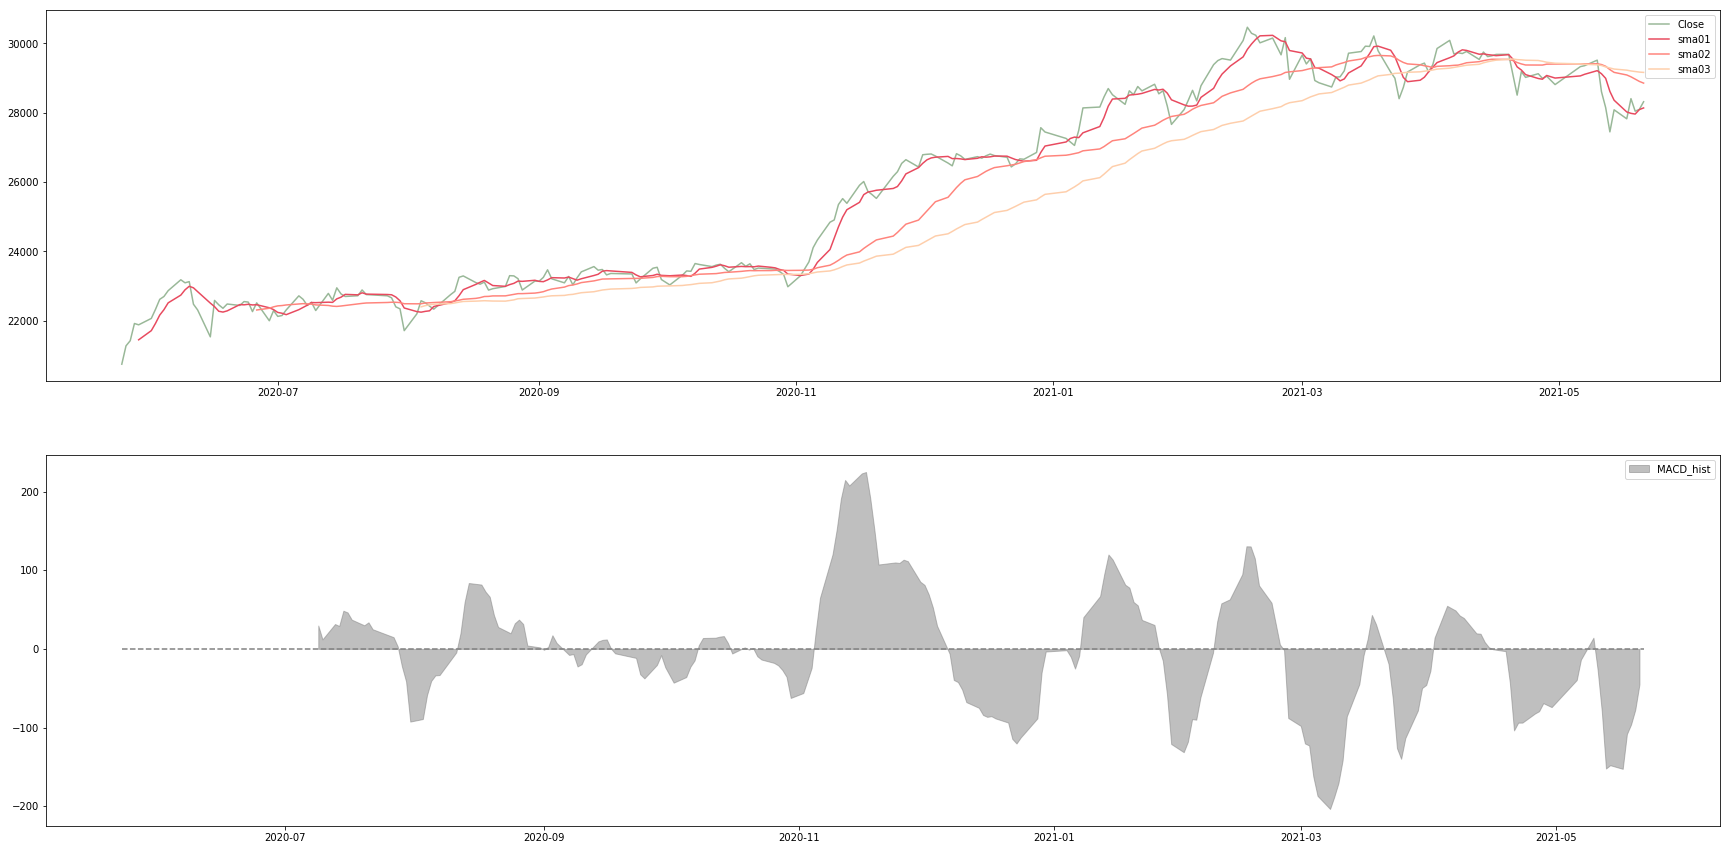

In [10]:
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.fill_between(date, df['macdhist'], color= 'grey', alpha=0.5, label='MACD_hist')
plt.hlines(0,start,end,"gray",linestyles='dashed')
plt.legend()

In [11]:
df['RSI'] = ta.RSI(close, timeperiod=span02)

In [12]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2021-05-17,28312.779297,27632.529297,28310.460938,27824.830078,63900000,27824.830078,28022.682031,29090.159297,29229.257266,-361.043726,-208.532669,-152.511058,42.182807
2021-05-18,28481.169922,27931.570312,27931.570312,28406.839844,74700000,28406.839844,27982.332031,29037.201328,29206.212070,-343.992766,-235.624688,-108.368077,46.383289
2021-05-19,28216.650391,27842.980469,28031.220703,28044.449219,68700000,28044.449219,27961.719922,28970.620078,29188.498867,-355.622259,-259.624202,-95.998057,44.296002
2021-05-20,28176.869141,27821.960938,27875.500000,28098.250000,56800000,28098.250000,28091.767969,28903.827656,29173.177461,-356.389210,-278.977204,-77.412006,44.680980
2021-05-21,28411.560547,28193.029297,28269.609375,28317.830078,58700000,28317.830078,28138.439844,28854.991641,29164.669063,-335.412323,-290.264228,-45.148095,46.259972


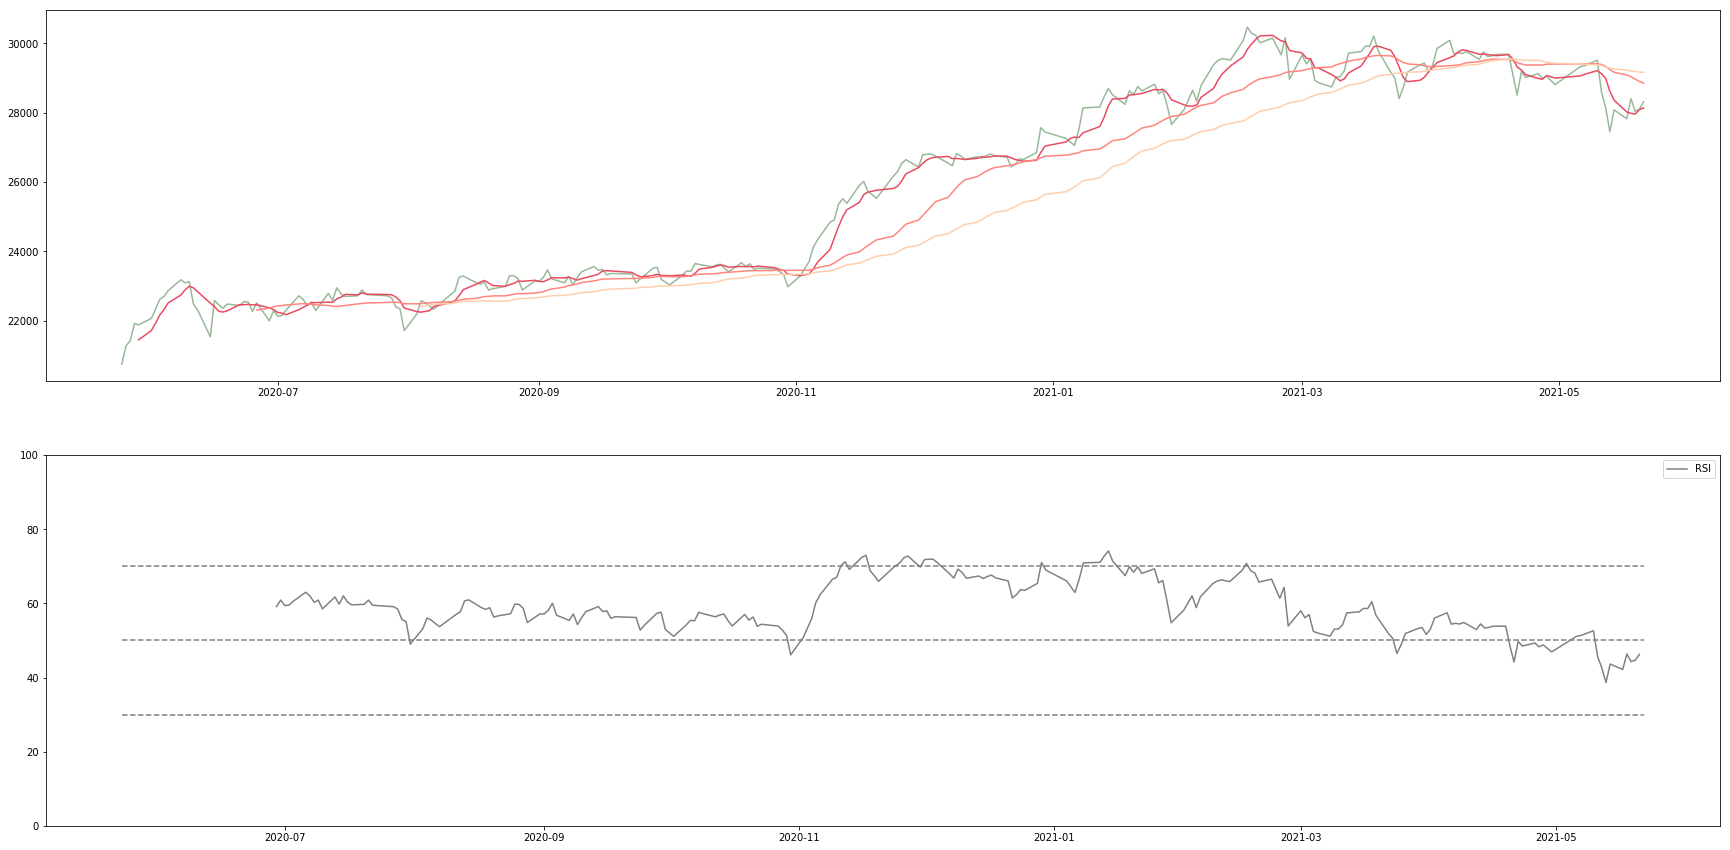

In [13]:
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)
plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')

plt.subplot(2,1,2)
plt.plot(date,df['RSI'],label='RSI',color='gray')
plt.ylim(0, 100)
plt.hlines([30,50,70],start,end,'gray',linestyles='dashed')
plt.legend()
